### Read data

In [1]:
import pandas as pd

# Define file path
file_path = "../../data/raw/MobiAct_combined.csv"

In [2]:
# Specify pyarrow for data to load faster
df = pd.read_csv(file_path, engine="pyarrow")

### Explore data

In [3]:
df

,timestamp,rel_time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label,subject_id,trial
0,1295405261000,0.000000,-1.407311,9.614395,-2.086666,-0.844216,0.409280,0.086437,92.746895,-36.879684,-11.741077,STD,10,1
1,1295410262000,0.005001,-1.406354,9.612960,-2.084512,-0.711047,0.346971,0.076358,92.205360,-37.470173,-11.839779,STD,10,1
2,1295415352000,0.010091,-1.405380,9.611498,-2.082320,-0.598953,0.093462,0.025045,91.743050,-38.090790,-11.880902,STD,10,1
3,1295420307000,0.015046,-1.404432,9.610076,-2.080186,-0.128893,-0.012828,-0.002443,91.267320,-38.842915,-11.933741,STD,10,1
4,1295425257000,0.019996,-1.403484,9.608654,-2.078055,0.049480,0.018326,0.016493,90.819680,-39.538643,-11.957446,STD,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756320,10354577784000,299.969995,-0.907934,13.533889,4.335380,1.207070,-6.215859,1.962099,218.442350,-56.026966,-33.223778,WAL,9,1
16756321,10354582775000,299.974986,-1.867024,12.331459,2.439285,0.968221,-6.103155,1.773953,220.688690,-57.077300,-31.897688,WAL,9,1
16756322,10354588060000,299.980271,-2.924407,11.485553,0.782717,0.740674,-6.034738,1.459663,222.816400,-58.044624,-30.614605,WAL,9,1
16756323,10354592749000,299.984960,-3.726923,11.084407,-0.258194,0.536645,-5.905845,1.027781,224.671650,-58.777103,-29.624798,WAL,9,1


In [4]:
# Check unique label
df['label'].nunique()

16

In [4]:
# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')

In [6]:
# Define subject data from Readme

data = {
    "subject_id": list(range(1, 68)),
    "age": [32, 26, 26, 32, 36, 22, 25, 22, 30, 26, 26, 29, 24, 24, 25, 27, 25, 25, 25, 26, 25, 22, 23, 21, 22, 25, 25, 23, 27, 47, 27, 25, 27, 24, 23, 22, 25, 21, 26, 23, 20, 22, 24, 25, 26, 23, 21, 22, 23, 23, 23, 20, 27, 27, 28, 29, 21, 21, 26, 24, 24, 20, 24, 26, 40, 20, 23],
    "height": [180, 169, 164, 186, 160, 172, 189, 183, 177, 170, 168, 178, 177, 178, 173, 172, 173, 176, 161, 178, 180, 187, 171, 193, 170, 163, 180, 178, 186, 172, 170, 190, 171, 175, 181, 164, 172, 170, 174, 178, 172, 173, 179, 176, 175, 175, 180, 180, 178, 165, 171, 179, 186, 164, 178, 170, 187, 158, 175, 183, 170, 180, 187, 181, 170, 193, 180],
    "weight": [85, 64, 55, 93, 50, 62, 80, 93, 102, 90, 80, 83, 62, 85, 82, 56, 67, 73, 63, 71, 70, 90, 64, 112, 62, 60, 82, 70, 103, 90, 75, 77, 70, 85, 76, 62, 63, 88, 79, 95, 67, 73, 80, 80, 92, 68, 85, 80, 75, 50, 70, 79, 120, 55, 78, 75, 70, 58, 70, 107, 70, 70, 85, 70, 100, 83, 67],
    "gender": ["M", "M", "F", "M", "F", "F", "M", "M", "M", "F", "F", "M", "M", "M", "M", "F", "M", "M", "F", "M", "M", "M", "M", "M", "F", "F", "M", "Ì", "M", "M", "M", "M", "M", "Ì", "M", "F", "M", "F", "M", "M", "F", "M", "M", "M", "M", "F", "M", "M", "M", "F", "M", "M", "M", "Ì", "F", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M"]
}

df_subject = pd.DataFrame(data)
df_subject


,subject_id,age,height,weight,gender
0,1,32,180,85,M
1,2,26,169,64,M
2,3,26,164,55,F
3,4,32,186,93,M
4,5,36,160,50,F
...,...,...,...,...,...
62,63,24,187,85,M
63,64,26,181,70,M
64,65,40,170,100,M
65,66,20,193,83,M


In [7]:
# Merge with orignal dataframe

df = df.merge(df_subject, on='subject_id', how='left')
df

,timestamp,rel_time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label,subject_id,trial,age,height,weight,gender
0,1970-01-01 00:21:35.405261,0.000000,-1.407311,9.614395,-2.086666,-0.844216,0.409280,0.086437,92.746895,-36.879684,-11.741077,STD,10,1,26,170,90,F
1,1970-01-01 00:21:35.410262,0.005001,-1.406354,9.612960,-2.084512,-0.711047,0.346971,0.076358,92.205360,-37.470173,-11.839779,STD,10,1,26,170,90,F
2,1970-01-01 00:21:35.415352,0.010091,-1.405380,9.611498,-2.082320,-0.598953,0.093462,0.025045,91.743050,-38.090790,-11.880902,STD,10,1,26,170,90,F
3,1970-01-01 00:21:35.420307,0.015046,-1.404432,9.610076,-2.080186,-0.128893,-0.012828,-0.002443,91.267320,-38.842915,-11.933741,STD,10,1,26,170,90,F
4,1970-01-01 00:21:35.425257,0.019996,-1.403484,9.608654,-2.078055,0.049480,0.018326,0.016493,90.819680,-39.538643,-11.957446,STD,10,1,26,170,90,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756320,1970-01-01 02:52:34.577784,299.969995,-0.907934,13.533889,4.335380,1.207070,-6.215859,1.962099,218.442350,-56.026966,-33.223778,WAL,9,1,30,177,102,M
16756321,1970-01-01 02:52:34.582775,299.974986,-1.867024,12.331459,2.439285,0.968221,-6.103155,1.773953,220.688690,-57.077300,-31.897688,WAL,9,1,30,177,102,M
16756322,1970-01-01 02:52:34.588060,299.980271,-2.924407,11.485553,0.782717,0.740674,-6.034738,1.459663,222.816400,-58.044624,-30.614605,WAL,9,1,30,177,102,M
16756323,1970-01-01 02:52:34.592749,299.984960,-3.726923,11.084407,-0.258194,0.536645,-5.905845,1.027781,224.671650,-58.777103,-29.624798,WAL,9,1,30,177,102,M


In [5]:
# Drop azimuth, pitch and roll
del df['azimuth']
del df['pitch']
del df['roll']

In [6]:
df

,timestamp,rel_time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial
0,1970-01-01 00:21:35.405261,0.000000,-1.407311,9.614395,-2.086666,-0.844216,0.409280,0.086437,STD,10,1
1,1970-01-01 00:21:35.410262,0.005001,-1.406354,9.612960,-2.084512,-0.711047,0.346971,0.076358,STD,10,1
2,1970-01-01 00:21:35.415352,0.010091,-1.405380,9.611498,-2.082320,-0.598953,0.093462,0.025045,STD,10,1
3,1970-01-01 00:21:35.420307,0.015046,-1.404432,9.610076,-2.080186,-0.128893,-0.012828,-0.002443,STD,10,1
4,1970-01-01 00:21:35.425257,0.019996,-1.403484,9.608654,-2.078055,0.049480,0.018326,0.016493,STD,10,1
...,...,...,...,...,...,...,...,...,...,...,...
16756320,1970-01-01 02:52:34.577784,299.969995,-0.907934,13.533889,4.335380,1.207070,-6.215859,1.962099,WAL,9,1
16756321,1970-01-01 02:52:34.582775,299.974986,-1.867024,12.331459,2.439285,0.968221,-6.103155,1.773953,WAL,9,1
16756322,1970-01-01 02:52:34.588060,299.980271,-2.924407,11.485553,0.782717,0.740674,-6.034738,1.459663,WAL,9,1
16756323,1970-01-01 02:52:34.592749,299.984960,-3.726923,11.084407,-0.258194,0.536645,-5.905845,1.027781,WAL,9,1


In [7]:
# Set timestamp as index
df.index = pd.to_datetime(df['timestamp'])

# Delete relative time and timestamp from column
del df['rel_time']
del df['timestamp']

In [8]:
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial
timestamp,,,,,,,,,
1970-01-01 00:21:35.405261,-1.407311,9.614395,-2.086666,-0.844216,0.409280,0.086437,STD,10,1
1970-01-01 00:21:35.410262,-1.406354,9.612960,-2.084512,-0.711047,0.346971,0.076358,STD,10,1
1970-01-01 00:21:35.415352,-1.405380,9.611498,-2.082320,-0.598953,0.093462,0.025045,STD,10,1
1970-01-01 00:21:35.420307,-1.404432,9.610076,-2.080186,-0.128893,-0.012828,-0.002443,STD,10,1
1970-01-01 00:21:35.425257,-1.403484,9.608654,-2.078055,0.049480,0.018326,0.016493,STD,10,1
...,...,...,...,...,...,...,...,...,...
1970-01-01 02:52:34.577784,-0.907934,13.533889,4.335380,1.207070,-6.215859,1.962099,WAL,9,1
1970-01-01 02:52:34.582775,-1.867024,12.331459,2.439285,0.968221,-6.103155,1.773953,WAL,9,1
1970-01-01 02:52:34.588060,-2.924407,11.485553,0.782717,0.740674,-6.034738,1.459663,WAL,9,1


Examine different resampling frequency to retain the most information

In [11]:
# Define resampling dictionary
sampling = {
    "acc_x": "mean",
    "acc_y": "mean",
    "acc_z": "mean",
    "gyro_x": "mean",
    "gyro_y": "mean",
    "gyro_z": "mean",
    "label": "last",
    "subject_id": "last",
    "trial": "last",
}


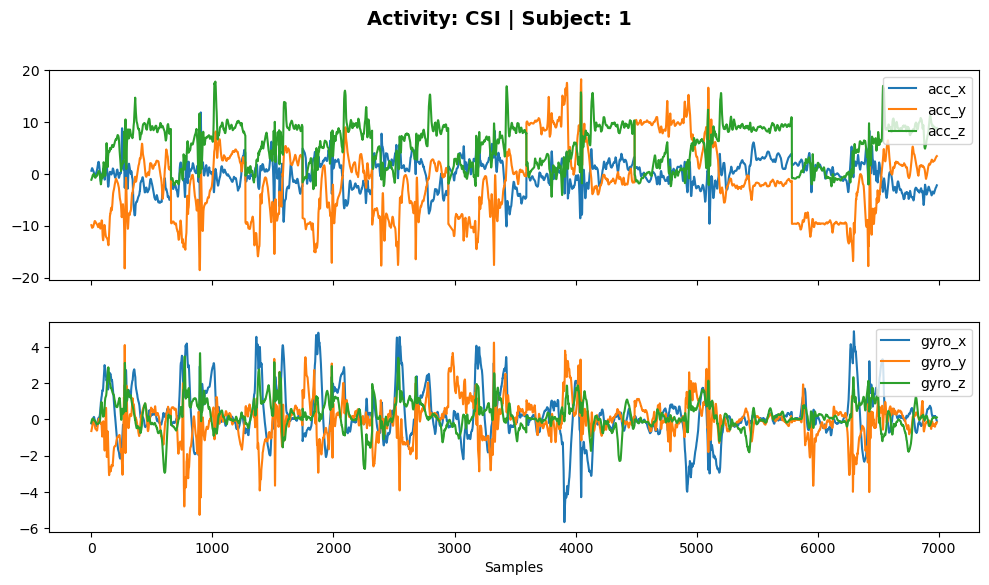

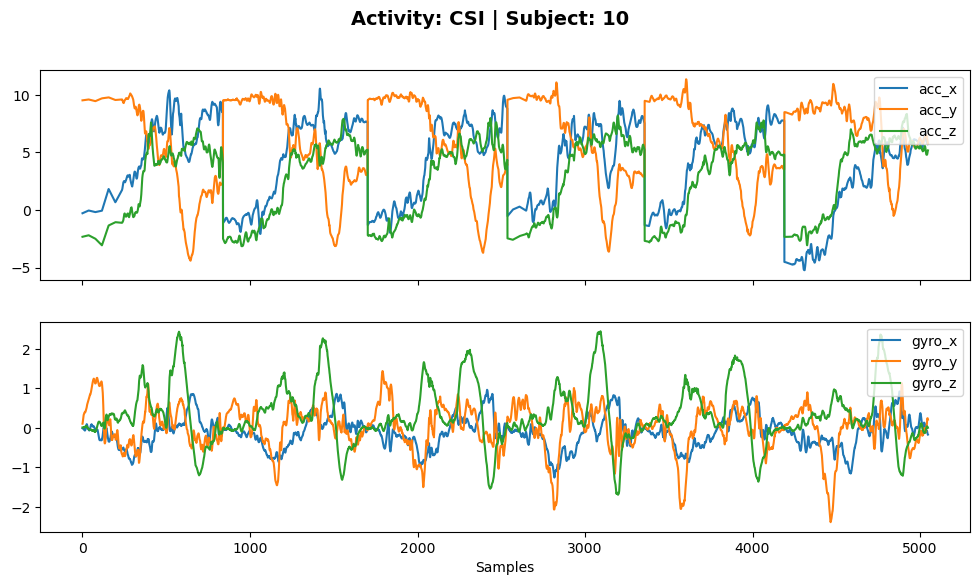

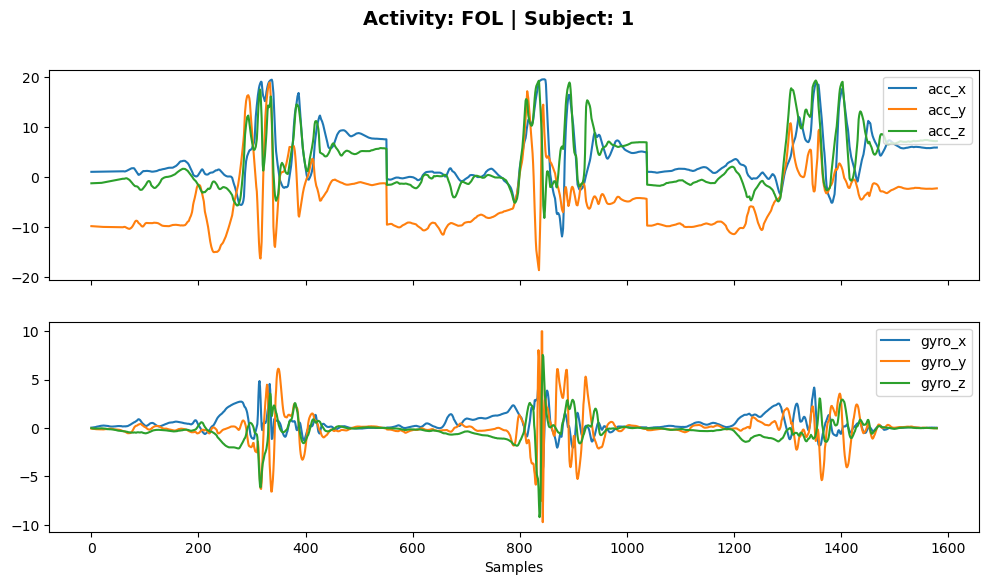

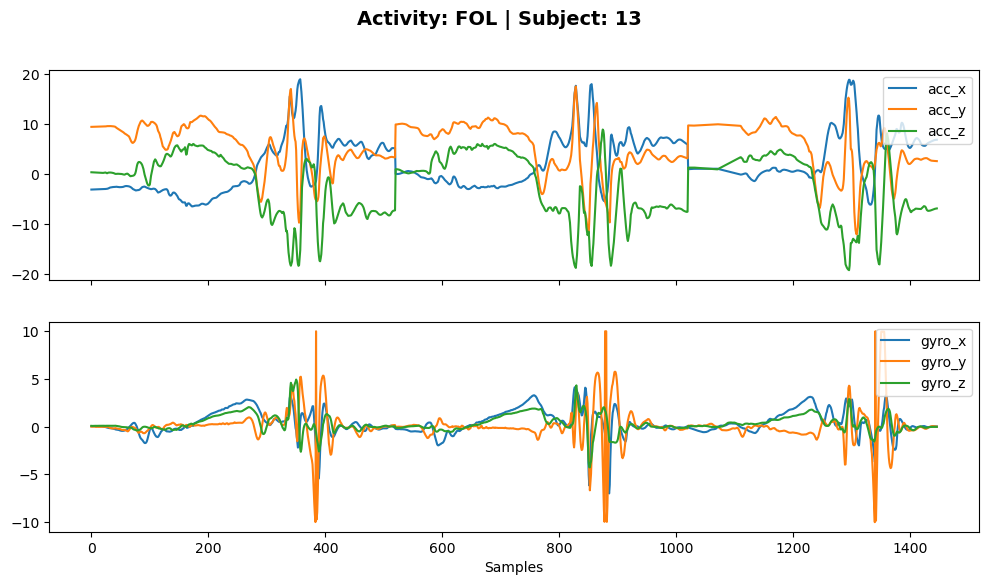

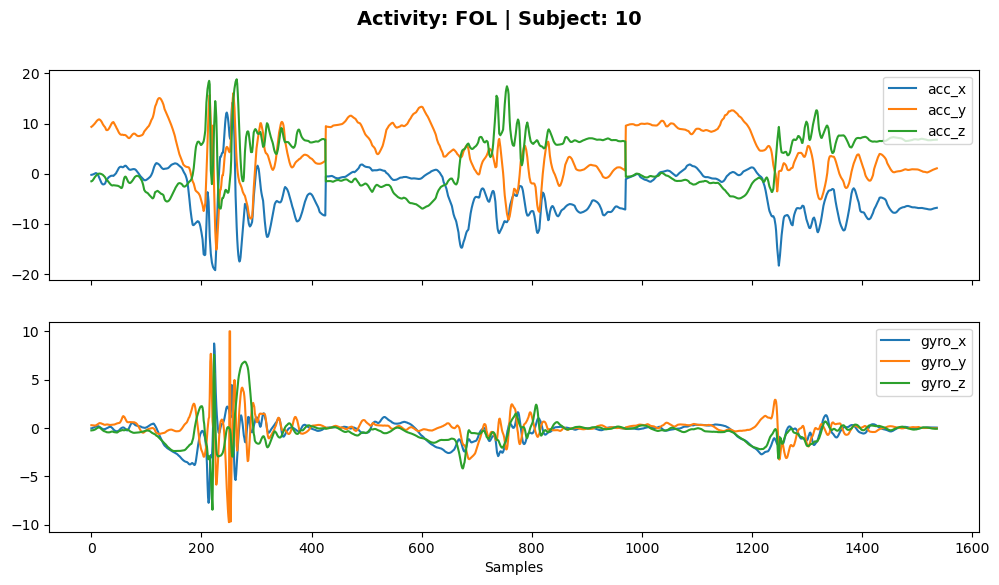

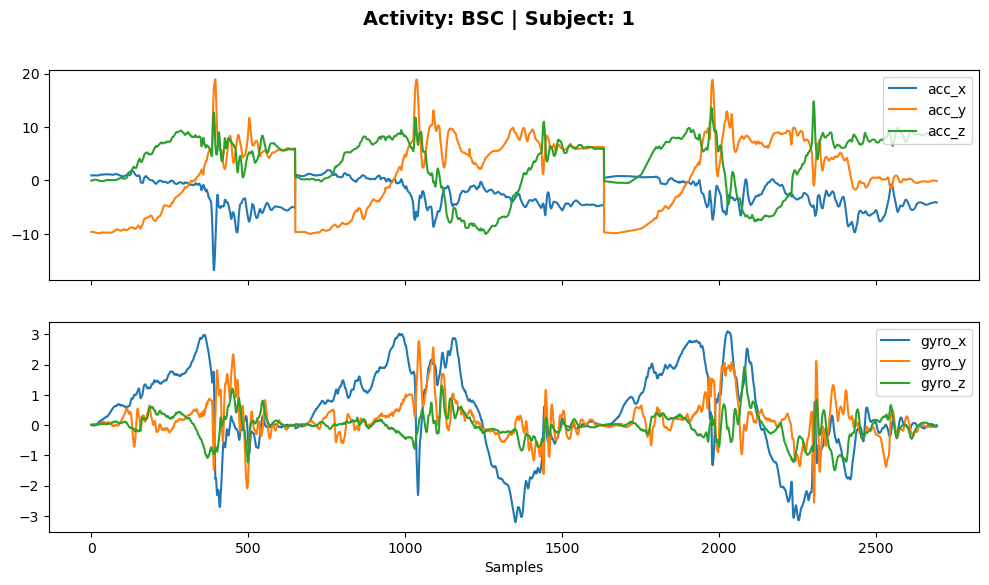

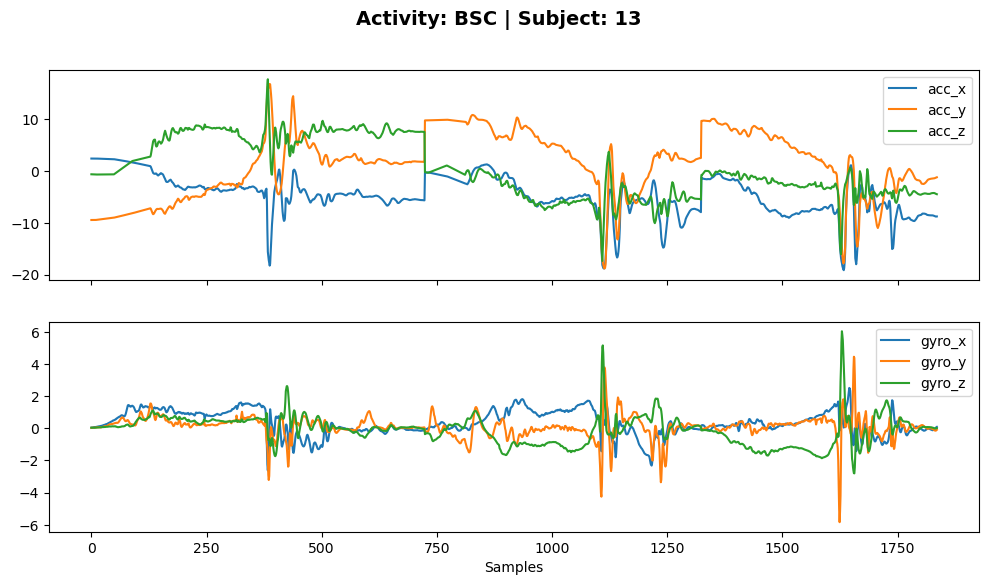

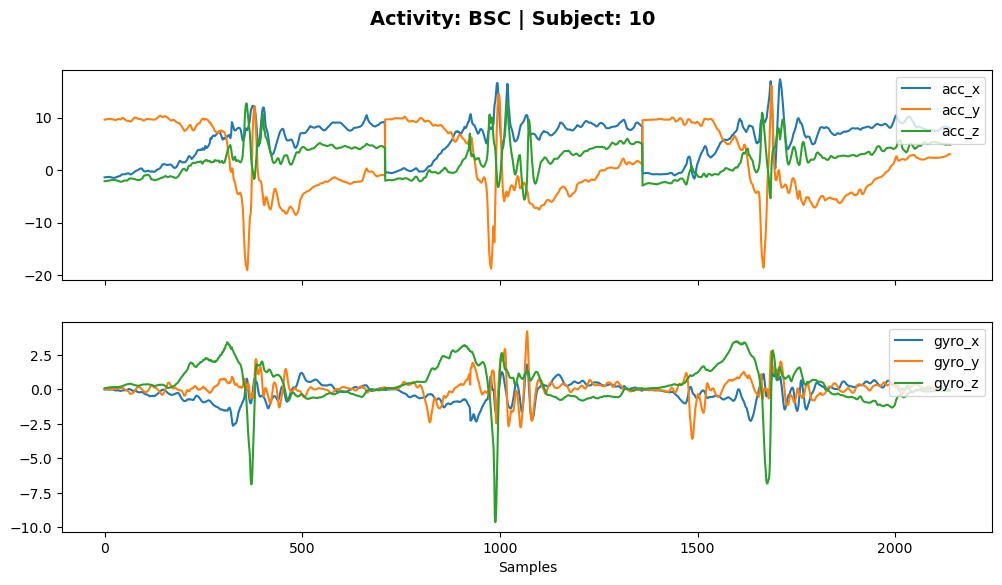

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plot_count = 0
max_plots = 10

labels = df['label'].unique()
subjects = df['subject_id'].unique()

# Select a random subset of labels and subjects to speed up execution
num_labels = min(3, len(labels))  # Limit the number of labels
num_subjects = min(3, len(subjects))  # Limit the number of subjects

sampled_labels = np.random.choice(labels, num_labels, replace=False)
sampled_subjects = np.random.choice(subjects, num_subjects, replace=False)

for label in sampled_labels:
    for subject in sampled_subjects:
        all_axis_df = df.loc[(df['label'] == label) & (df['subject_id'] == subject)].reset_index()

        if len(all_axis_df) > 0:
            fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))  # Adjusted figure size
            all_axis_df[["acc_x", "acc_y", "acc_z"]].plot(ax=ax[0])
            all_axis_df[["gyro_x", "gyro_y", "gyro_z"]].plot(ax=ax[1])

            ax[0].legend(loc="upper right")
            ax[1].legend(loc="upper right")
            ax[1].set_xlabel("Samples")

            # Add Title
            fig.suptitle(f"Activity: {label} | Subject: {subject}", fontsize=14, fontweight="bold")
            plt.show()

            plot_count += 1
            if plot_count >= max_plots:
                break
    if plot_count >= max_plots:
        break


Since the original data is measured in ns second, it is somewhat too noisy for analysis

In [14]:
# try 100ms resampling

df_resample_100ms

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial,age,height,weight,gender
timestamp,,,,,,,,,,,,,
1970-01-01 00:00:58.100,-0.448554,9.800728,0.861867,-0.016863,-0.016220,-0.001817,STD,64.0,1.0,26.0,181.0,70.0,M
1970-01-01 00:00:58.200,-0.423078,9.847417,0.910418,-0.029963,0.011622,0.005910,STD,64.0,1.0,26.0,181.0,70.0,M
1970-01-01 00:00:58.300,-0.508493,9.690679,0.735099,-0.011591,0.108765,-0.041188,STD,64.0,1.0,26.0,181.0,70.0,M
1970-01-01 00:00:58.400,0.117676,9.828999,0.931107,0.020831,0.054153,-0.055573,STD,64.0,1.0,26.0,181.0,70.0,M
1970-01-01 00:00:58.500,-0.633207,9.793750,1.189342,0.065195,0.106000,-0.100014,STD,64.0,1.0,26.0,181.0,70.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-02 12:44:21.100,7.095328,1.309029,6.478968,-0.010904,-0.002138,0.005544,SIT,23.0,6.0,23.0,171.0,64.0,M
1970-01-02 12:44:21.200,7.124292,1.273677,6.443987,-0.009087,-0.005620,0.006750,SIT,23.0,6.0,23.0,171.0,64.0,M
1970-01-02 12:44:21.300,7.116475,1.300129,6.441539,-0.012737,0.003482,0.006093,SIT,23.0,6.0,23.0,171.0,64.0,M


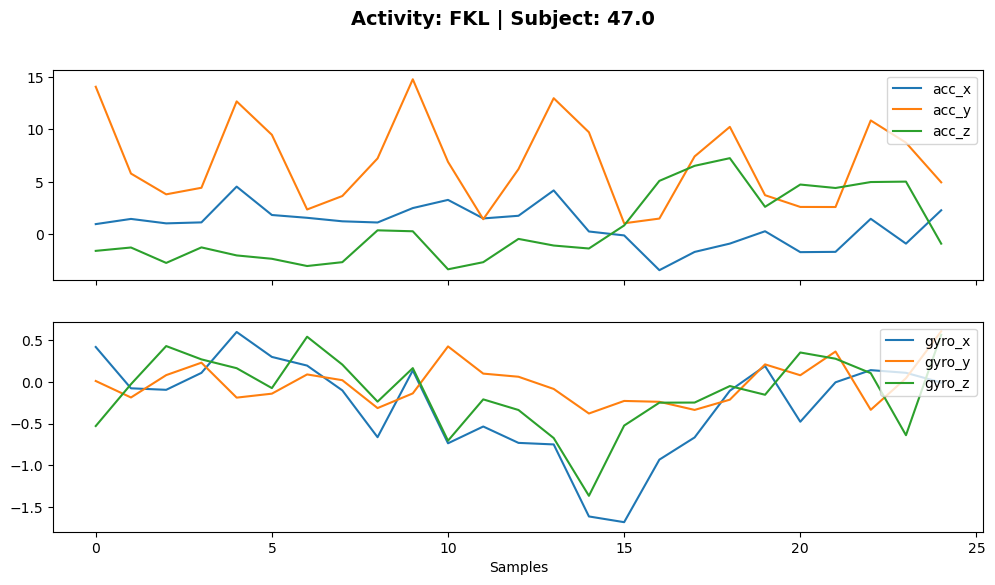

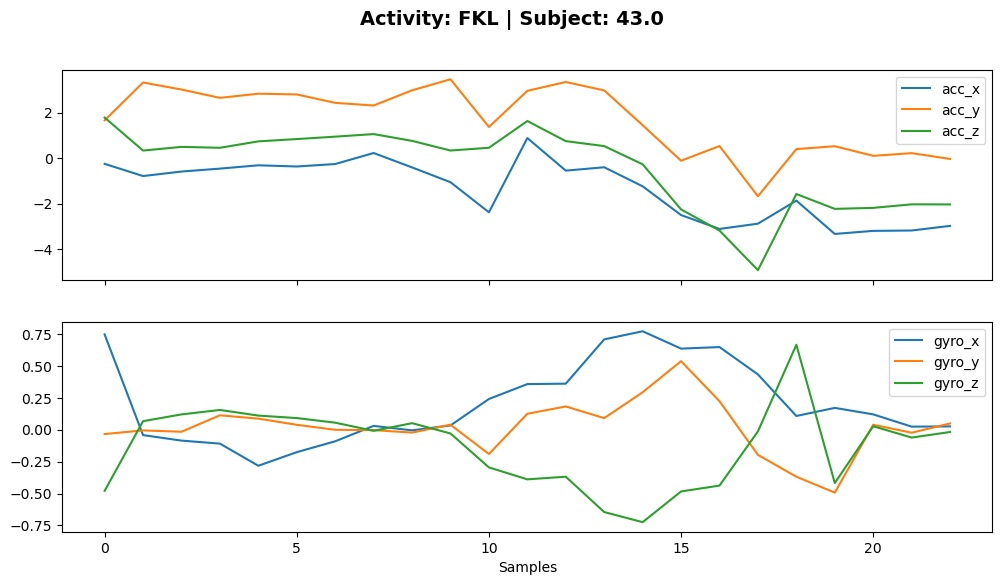

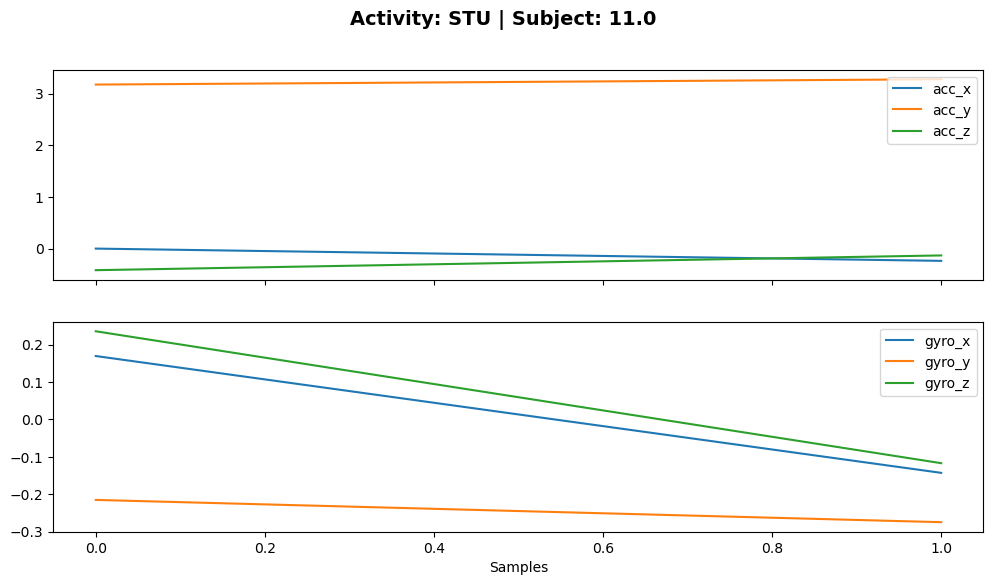

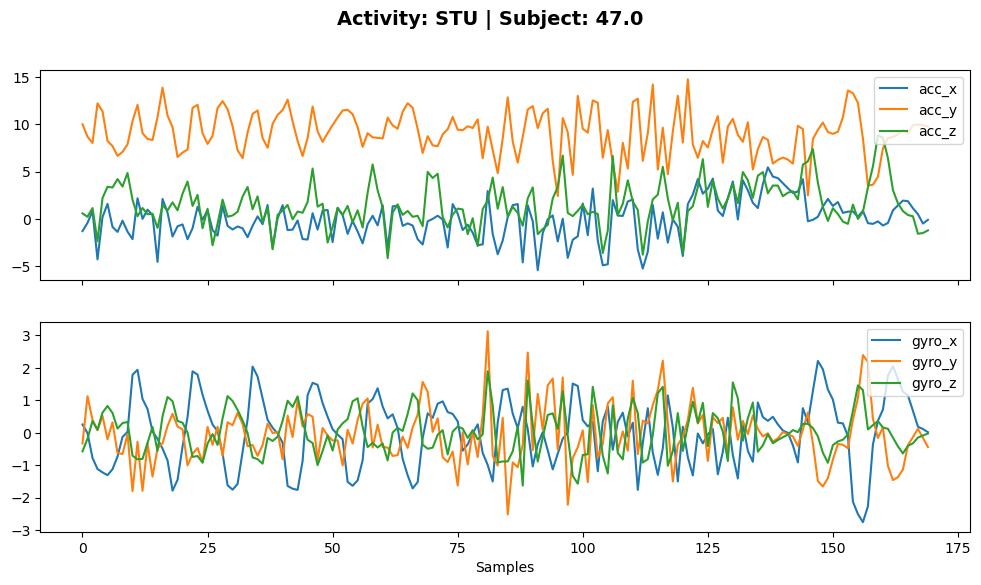

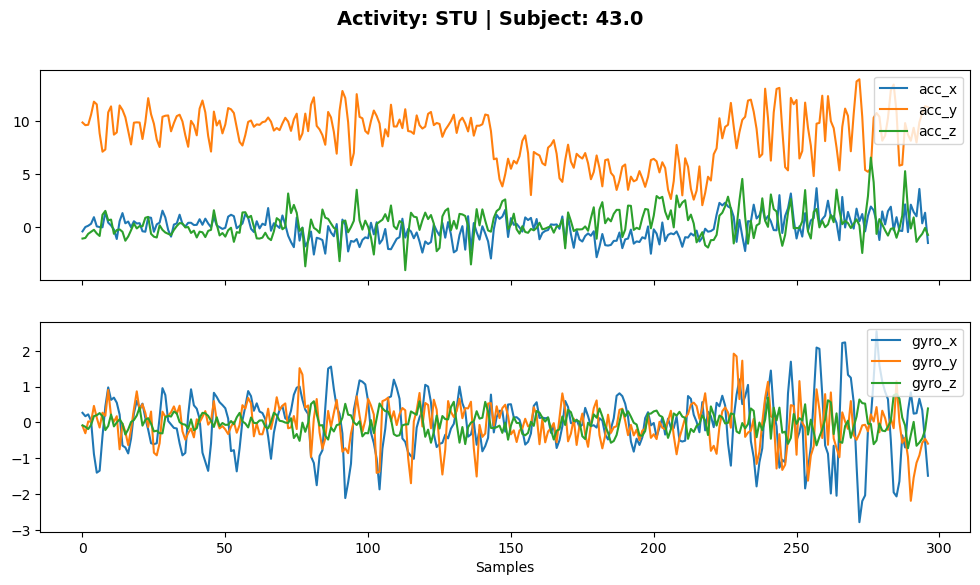

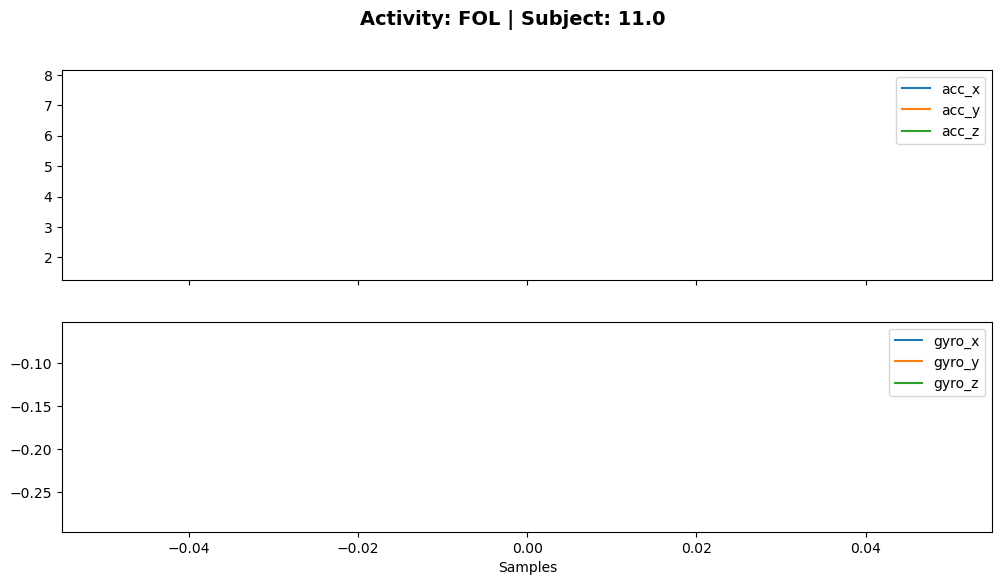

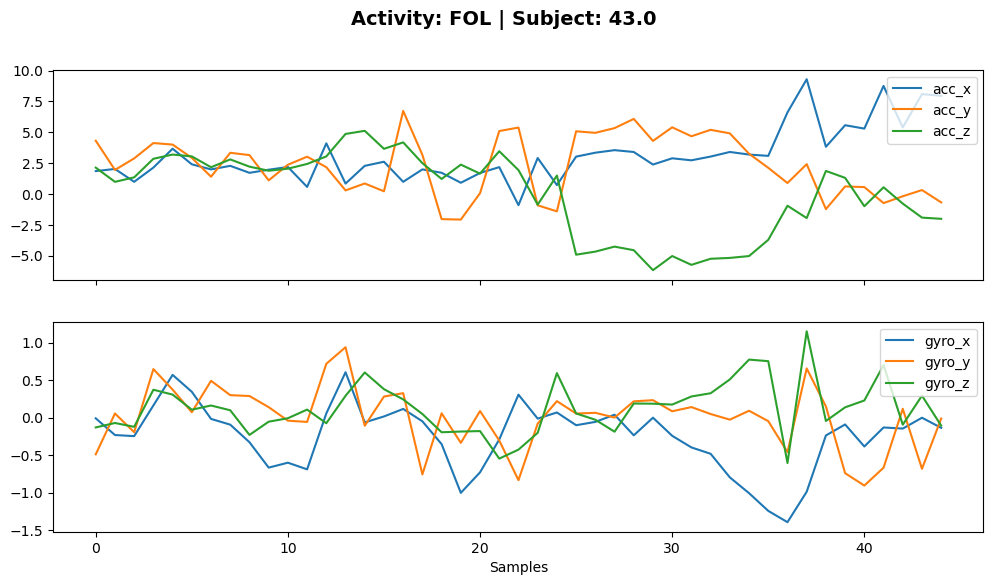

In [15]:
plot_count = 0
max_plots = 10

labels = df_resample_100ms['label'].unique()
subjects = df_resample_100ms['subject_id'].unique()

# Select a random subset of labels and subjects to speed up execution
num_labels = min(3, len(labels))  # Limit the number of labels
num_subjects = min(3, len(subjects))  # Limit the number of subjects

sampled_labels = np.random.choice(labels, num_labels, replace=False)
sampled_subjects = np.random.choice(subjects, num_subjects, replace=False)

for label in sampled_labels:
    for subject in sampled_subjects:
        all_axis_df = df_resample_100ms.loc[
            (df_resample_100ms['label'] == label) & 
            (df_resample_100ms['subject_id'] == subject)
        ].reset_index()

        if len(all_axis_df) > 0:
            fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))  # Adjusted figure size
            all_axis_df[["acc_x", "acc_y", "acc_z"]].plot(ax=ax[0])
            all_axis_df[["gyro_x", "gyro_y", "gyro_z"]].plot(ax=ax[1])

            ax[0].legend(loc="upper right")
            ax[1].legend(loc="upper right")
            ax[1].set_xlabel("Samples")

            # Add Title
            fig.suptitle(f"Activity: {label} | Subject: {subject}", fontsize=14, fontweight="bold")
            plt.show()

            plot_count += 1
            if plot_count >= max_plots:
                break
    if plot_count >= max_plots:
        break


Still a bit cluttered lets try 200ms

In [16]:
results = []
for (subject, label), group in df.groupby(["subject_id", "label"]):
    resampled = group.resample("200ms").apply(sampling)
    results.append(resampled)

df_resample_200ms = pd.concat(results)

In [17]:
df_resample_200ms

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial,age,height,weight,gender
timestamp,,,,,,,,,,,,,
1970-01-01 00:38:38.600,0.948777,-9.636166,0.002699,0.003818,0.016875,0.006643,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:38.800,1.010253,-9.773326,-0.003064,0.094707,0.051656,0.026733,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:39.000,1.130927,-9.598642,0.070442,0.466991,0.033453,0.071845,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:39.200,1.021966,-9.219602,0.540483,0.638049,0.279051,0.058765,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:39.400,0.931730,-8.782092,2.784333,0.978698,0.016310,-0.101060,BSC,1.0,1.0,32.0,180.0,85.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 04:49:54.800,1.582939,9.459767,-0.770287,0.840092,-0.675701,-1.023222,WAL,67.0,1.0,23.0,180.0,67.0,M
1970-01-01 04:49:55.000,2.521243,9.104090,-0.370340,0.101373,-0.184100,-0.463471,WAL,67.0,1.0,23.0,180.0,67.0,M
1970-01-01 04:49:55.200,0.282982,12.611992,0.984774,-1.720067,-0.268498,1.235757,WAL,67.0,1.0,23.0,180.0,67.0,M


In [ ]:
# Resample again but preserve activity perform by each subject

results = []
for (subject, label), group in df.groupby(["subject_id", "label"]):
    resampled = group.resample("100ms").apply(sampling)
    results.append(resampled)

df_resample_100ms = pd.concat(results)

In [19]:
df.query("subject_id == 3").query("label == 'LYI'") # sense check

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial,age,height,weight,gender
timestamp,,,,,,,,,,,,,
1970-01-01 00:11:28.658333,-5.770447,-0.387662,7.709683,-0.014050,-0.041844,0.000611,LYI,3,1,26,164,55,F
1970-01-01 00:11:28.662871,-5.704672,-0.418818,7.654294,-0.001222,-0.049480,0.001833,LYI,3,1,26,164,55,F
1970-01-01 00:11:28.667899,-5.658852,-0.425186,7.635600,-0.006109,-0.050396,0.004887,LYI,3,1,26,164,55,F
1970-01-01 00:11:28.672953,-5.627545,-0.416242,7.640073,-0.005192,-0.052229,0.006720,LYI,3,1,26,164,55,F
1970-01-01 00:11:28.677927,-5.612009,-0.414065,7.640029,-0.012523,-0.056505,0.011301,LYI,3,1,26,164,55,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:10:35.287858,-7.167825,1.815642,6.382316,0.016799,0.022602,0.025656,LYI,3,3,26,164,55,F
1970-01-01 00:10:35.292881,-7.162845,1.849538,6.388337,0.005803,0.024435,0.020464,LYI,3,3,26,164,55,F
1970-01-01 00:10:35.297835,-7.149519,1.876189,6.401663,0.008552,0.029627,0.017715,LYI,3,3,26,164,55,F


In [20]:
df_resample_100ms.query("subject_id == 3").query("label == 'LYI'") # sense check

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial,age,height,weight,gender
timestamp,,,,,,,,,,,,,
1970-01-01 00:03:12.500,5.626573,1.439763,7.281013,-0.062766,-0.075136,0.031612,LYI,3.0,1.0,26.0,164.0,55.0,F
1970-01-01 00:03:12.600,5.973827,1.407701,7.593715,-0.048457,-0.034117,-0.009484,LYI,3.0,1.0,26.0,164.0,55.0,F
1970-01-01 00:03:12.700,5.767522,1.830174,7.446066,0.008415,0.036469,-0.035751,LYI,3.0,1.0,26.0,164.0,55.0,F
1970-01-01 00:03:12.800,5.477274,2.079195,7.702314,0.014981,0.037904,-0.015623,LYI,3.0,1.0,26.0,164.0,55.0,F
1970-01-01 00:03:12.900,5.553918,2.066204,7.619635,-0.014707,0.008796,0.008842,LYI,3.0,1.0,26.0,164.0,55.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:14:42.800,-5.757915,-3.565087,6.838687,0.011561,-0.009636,0.010003,LYI,3.0,3.0,26.0,164.0,55.0,F
1970-01-01 00:14:42.900,-5.639428,-3.467378,6.903772,0.011515,-0.010385,0.012492,LYI,3.0,3.0,26.0,164.0,55.0,F
1970-01-01 00:14:43.000,-5.656448,-3.475905,6.887697,0.001802,0.006842,0.008812,LYI,3.0,3.0,26.0,164.0,55.0,F


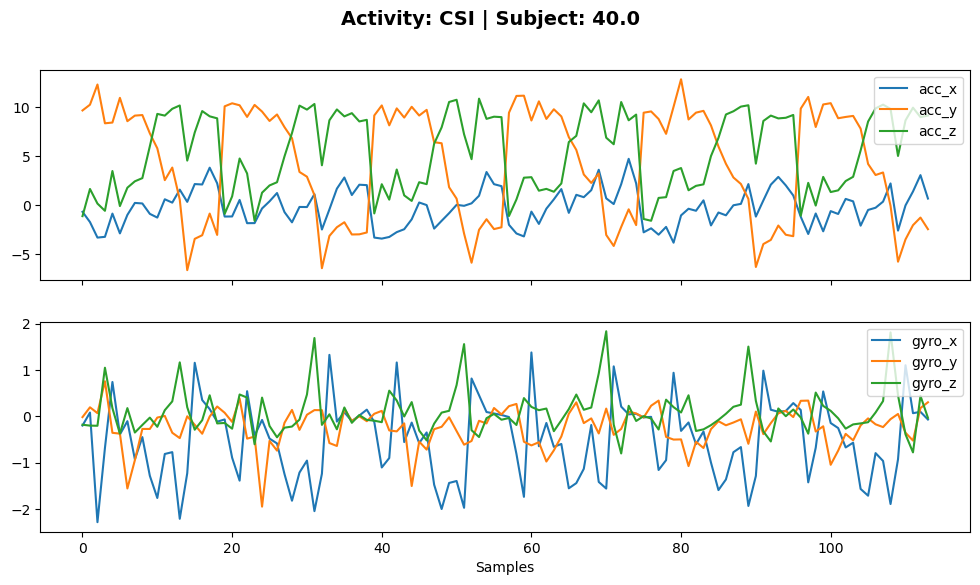

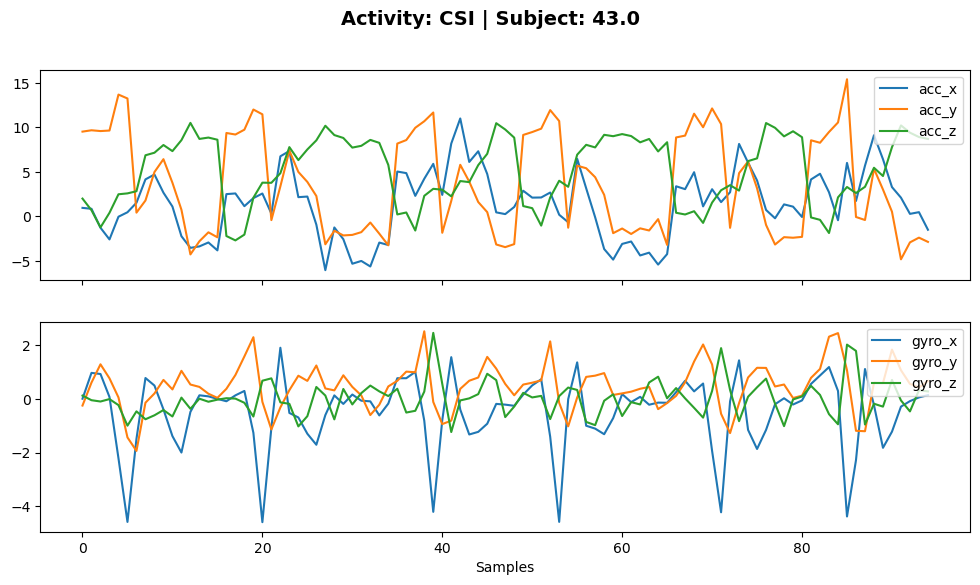

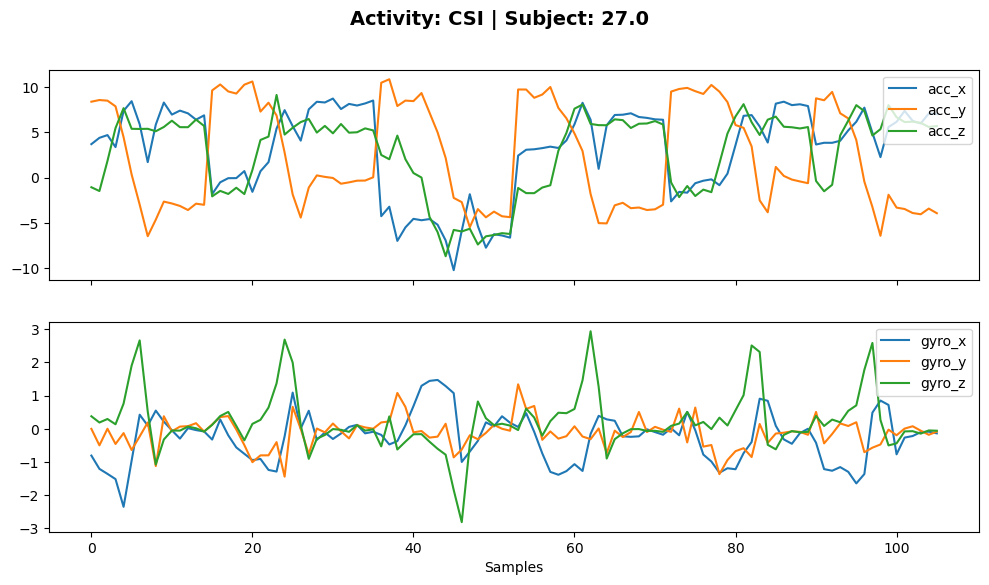

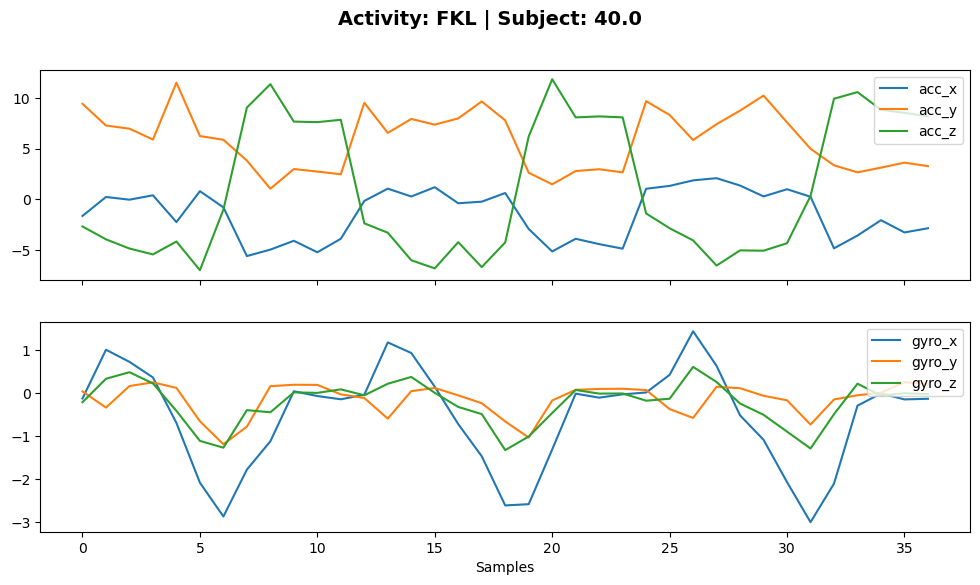

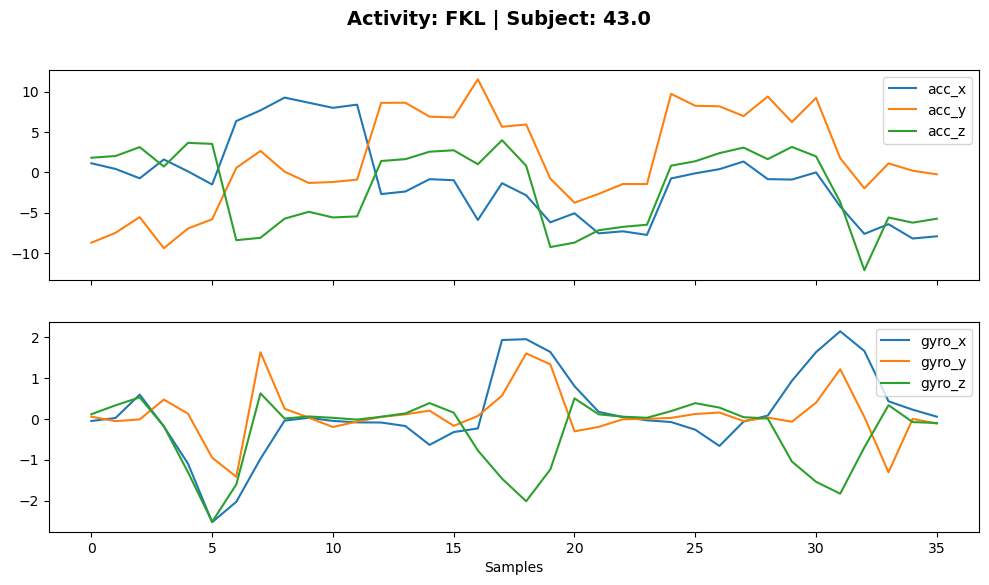

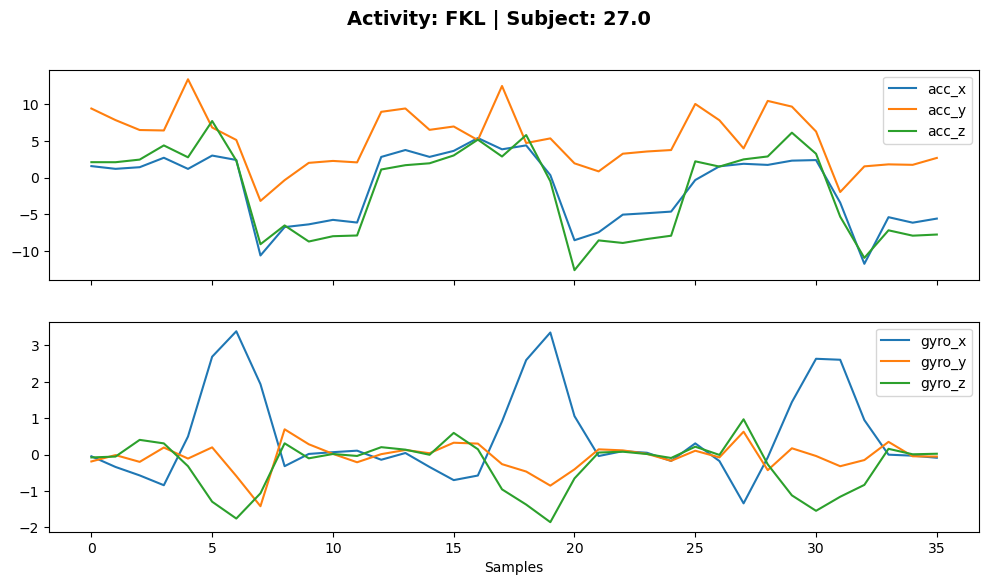

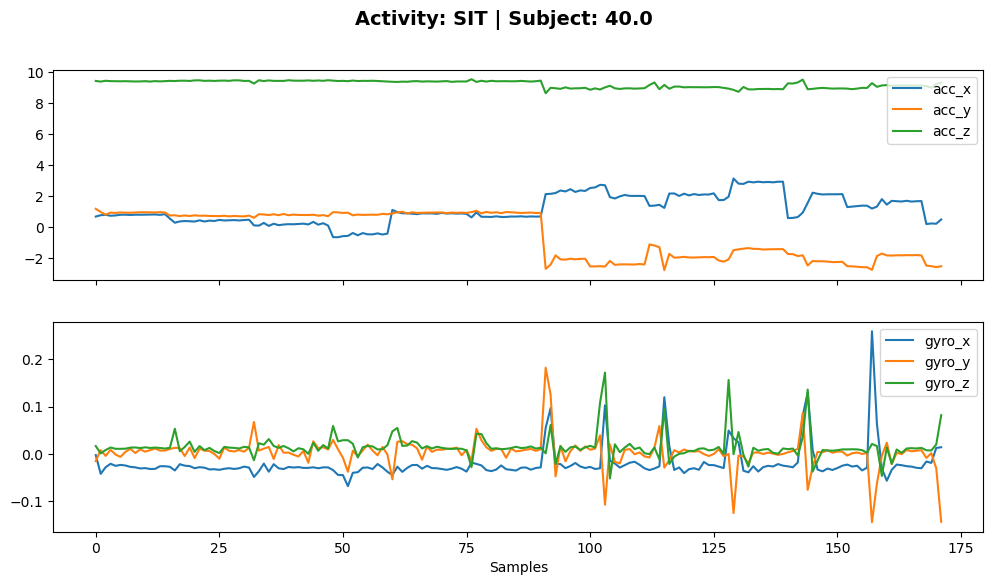

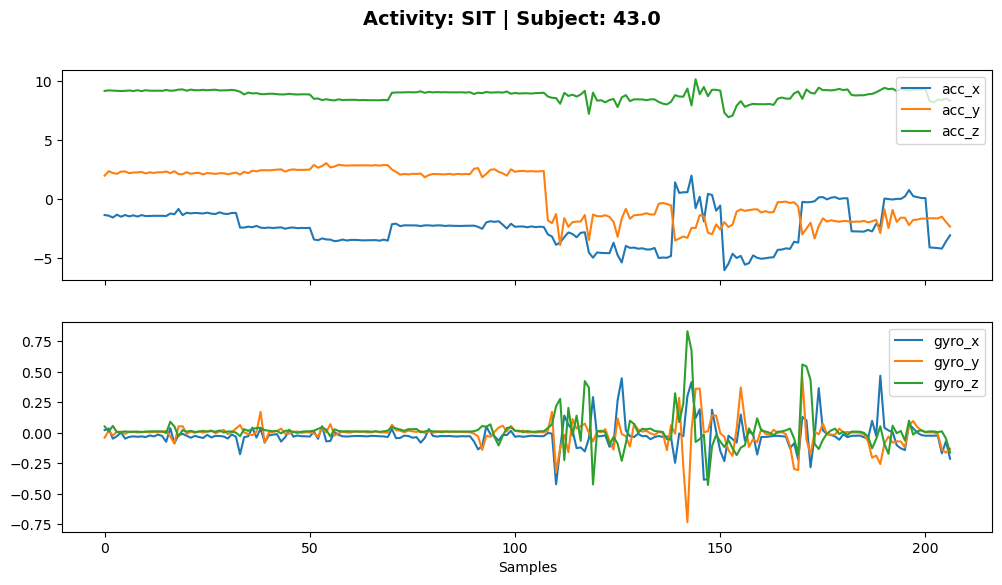

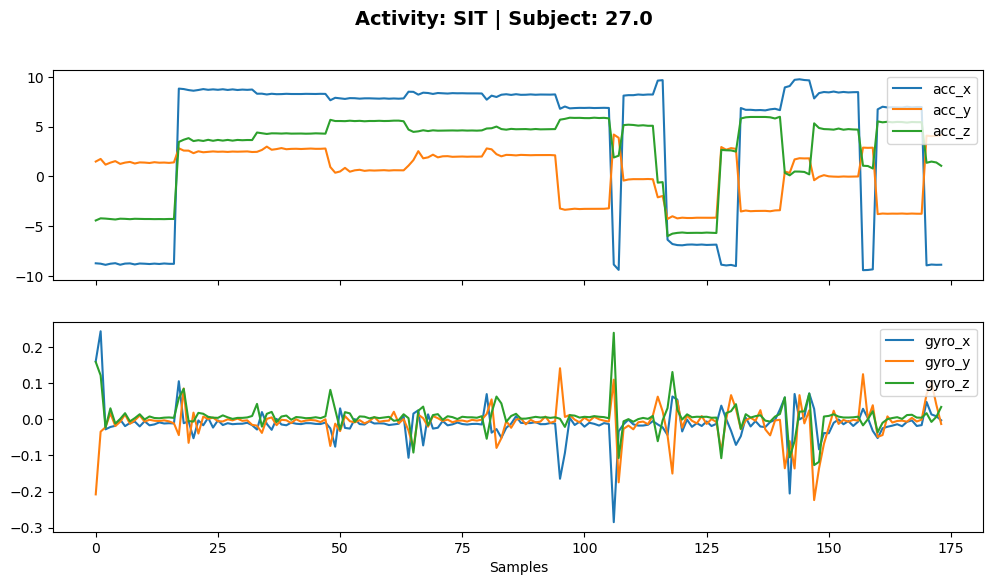

In [21]:
plot_count = 0
max_plots = 10

labels = df_resample_200ms['label'].unique()
subjects = df_resample_200ms['subject_id'].unique()

# Select a random subset of labels and subjects to speed up execution
num_labels = min(3, len(labels))  # Limit the number of labels
num_subjects = min(3, len(subjects))  # Limit the number of subjects

sampled_labels = np.random.choice(labels, num_labels, replace=False)
sampled_subjects = np.random.choice(subjects, num_subjects, replace=False)

for label in sampled_labels:
    for subject in sampled_subjects:
        all_axis_df = df_resample_200ms.loc[
            (df_resample_200ms['label'] == label) & 
            (df_resample_200ms['subject_id'] == subject)
        ].reset_index()

        if len(all_axis_df) > 0:
            fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))  # Adjusted figure size
            all_axis_df[["acc_x", "acc_y", "acc_z"]].plot(ax=ax[0])
            all_axis_df[["gyro_x", "gyro_y", "gyro_z"]].plot(ax=ax[1])

            ax[0].legend(loc="upper right")
            ax[1].legend(loc="upper right")
            ax[1].set_xlabel("Samples")

            # Add Title
            fig.suptitle(f"Activity: {label} | Subject: {subject}", fontsize=14, fontweight="bold")
            plt.show()

            plot_count += 1
            if plot_count >= max_plots:
                break
    if plot_count >= max_plots:
        break


200 seems to be too much. At this stage we will progress with 100ms resampling. We will save 50ms, 100ms, and 200ms in interim to evaluate model performance later

In [22]:
df_resample_50ms = df.resample("50ms").apply(sampling)

In [12]:
# Resample again but preserve activity perform by each subject

results = []
for (subject, label), group in df.groupby(["subject_id", "label"]):
    resampled = group.resample("20ms").apply(sampling)
    results.append(resampled)

df_resample_20ms = pd.concat(results)

In [13]:
df_resample_20ms = df_resample_20ms.dropna()

In [14]:
df_resample_20ms.to_pickle("../../data/raw/df_resample_20ms.pkl")

In [29]:
df_resample_50ms = df_resample_50ms.dropna()
df_resample_100ms = df_resample_100ms.dropna()
df_resample_200ms = df_resample_200ms.dropna()


In [30]:
# Save dataset into raw folder for different sampling
df_resample_50ms.to_pickle("../../data/raw/df_resample_50ms.pkl")
df_resample_100ms.to_pickle("../../data/raw/df_resample_100ms.pkl")
df_resample_200ms.to_pickle("../../data/raw/df_resample_200ms.pkl")

Key notes:

1. The timestamp is in ns which is likely too noisy to model (can still test out without resampling to see model performance, but without resampling it will take a long time to generate timebased features, just because there are too many datapoints)

2. When resampling need to take into account 'subject_id' and likely 'label' as well because the participants did not equally perform all activities. Maybe group by 'subject_id' then 'label', then resample.

3. The duration between each timestamp is around 5ms (200hz).

4. We can explore further how resampling impact model evaluation and optimize for the best sampling rate.
